# Machine Learning with sklearn - SOLVED

This notebook introduces machine learning concepts using scikit-learn:

**Core Concepts**:
- **Train/Test Split**: Evaluating on unseen data
- **Cross-Validation**: Robust model evaluation
- **Overfitting vs Underfitting**: Bias-variance trade-off

**Regression Tasks**:
- Linear Regression, Ridge, Lasso
- Decision Trees, Random Forests
- Model comparison and selection

**Classification Tasks**:
- Logistic Regression
- Decision Trees, Random Forests
- Evaluation metrics (accuracy, precision, recall, AUC)

**Model Selection**:
- Hyperparameter tuning with GridSearchCV
- Pipelines for reproducible workflows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

# Load datasets
tips = sns.load_dataset('tips')
diamonds = sns.load_dataset('diamonds')
mpg = sns.load_dataset('mpg').dropna()

print("Datasets loaded: tips, diamonds, mpg")
print(f"tips: {tips.shape[0]} rows")
print(f"diamonds: {diamonds.shape[0]} rows")
print(f"mpg: {mpg.shape[0]} rows")

Datasets loaded: tips, diamonds, mpg
tips: 244 rows
diamonds: 53940 rows
mpg: 392 rows


---
## 1. Train/Test Split: The Foundation of ML Evaluation

**Key Principle**: Never evaluate a model on data it was trained on!

**Why?** A model can memorize training data (overfitting) and appear perfect,
but fail completely on new data.

**Solution**: Split data into:
- **Training set** (typically 70-80%): Used to fit the model
- **Test set** (typically 20-30%): Used only for final evaluation

**Example**: Predicting diamond prices.

In [2]:
# Example: Train/Test Split
# Prepare data
diamonds_ml = diamonds.sample(2000, random_state=42).copy()
X = diamonds_ml[['carat', 'depth', 'table']].values
y = diamonds_ml['price'].values

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Total samples: {len(X)}")
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.0f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.0f}%)")

# Fit a linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate on BOTH sets
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print(f"\nLinear Regression:")
print(f"  Training R²: {train_r2:.4f}")
print(f"  Test R²: {test_r2:.4f}")
print(f"\nIf Train R² >> Test R², the model is OVERFITTING!")

Total samples: 2000
Training set: 1600 samples (80%)
Test set: 400 samples (20%)

Linear Regression:
  Training R²: 0.8662
  Test R²: 0.8589

If Train R² >> Test R², the model is OVERFITTING!


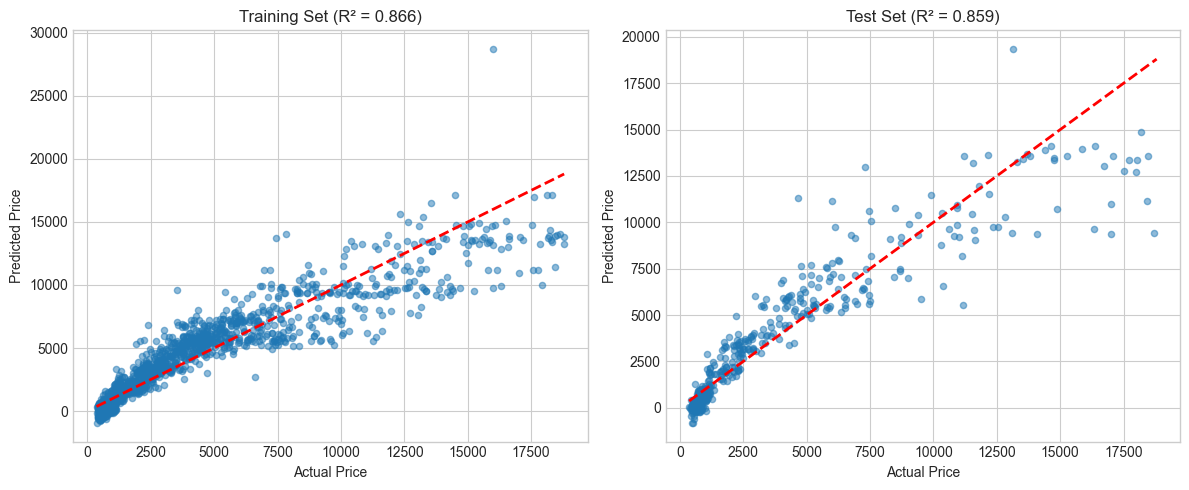

In [3]:
# Visualize predictions vs actual
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training set
ax1 = axes[0]
ax1.scatter(y_train, y_pred_train, alpha=0.5, s=20)
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(f'Training Set (R² = {train_r2:.3f})')

# Test set
ax2 = axes[1]
ax2.scatter(y_test, y_pred_test, alpha=0.5, s=20)
ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title(f'Test Set (R² = {test_r2:.3f})')

plt.tight_layout()
plt.show()

### Exercise 1: Train/Test Split

Use the `mpg` dataset.

**1.1** Create features X with columns `['horsepower', 'weight', 'acceleration']` and target y = `mpg`.

**1.2** Split the data 70/30 (train/test) with `random_state=42`.

**1.3** Fit a `LinearRegression` and report Train R² and Test R².

**1.4** Is the model overfitting? How can you tell?

In [4]:
# Exercise 1: SOLUTION

# 1.1 Create features and target
X_mpg = mpg[['horsepower', 'weight', 'acceleration']].values
y_mpg = mpg['mpg'].values

print(f"Features shape: {X_mpg.shape}")
print(f"Target shape: {y_mpg.shape}")

# 1.2 Split 70/30
X_train_mpg, X_test_mpg, y_train_mpg, y_test_mpg = train_test_split(
    X_mpg, y_mpg, test_size=0.3, random_state=42
)

print(f"\nTraining set: {len(X_train_mpg)} samples")
print(f"Test set: {len(X_test_mpg)} samples")

# 1.3 Fit Linear Regression
lr_mpg = LinearRegression()
lr_mpg.fit(X_train_mpg, y_train_mpg)

train_r2_mpg = lr_mpg.score(X_train_mpg, y_train_mpg)
test_r2_mpg = lr_mpg.score(X_test_mpg, y_test_mpg)

print(f"\nLinear Regression Results:")
print(f"  Train R²: {train_r2_mpg:.4f}")
print(f"  Test R²: {test_r2_mpg:.4f}")

# 1.4 Overfitting analysis
print(f"\n1.4 Overfitting Analysis:")
diff = train_r2_mpg - test_r2_mpg
print(f"  Difference (Train - Test): {diff:.4f}")

if diff < 0.05:
    print("  → Model is NOT overfitting.")
    print("    Train and Test R² are similar, indicating good generalization.")
else:
    print("  → Model IS overfitting.")
    print("    Train R² is significantly higher than Test R².")

Features shape: (392, 3)
Target shape: (392,)

Training set: 274 samples
Test set: 118 samples

Linear Regression Results:
  Train R²: 0.7207
  Test R²: 0.6502

1.4 Overfitting Analysis:
  Difference (Train - Test): 0.0705
  → Model IS overfitting.
    Train R² is significantly higher than Test R².


---
## 2. Cross-Validation: More Robust Evaluation

**Problem with single split**: Results depend on which samples end up in test set.

**Solution**: K-Fold Cross-Validation
1. Split data into K equal folds
2. Train on K-1 folds, test on remaining fold
3. Repeat K times (each fold is test set once)
4. Average the K scores

**Benefits**:
- Uses all data for both training and testing
- Provides estimate of variance (stability)
- More reliable model comparison

In [5]:
# Example: K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score

# Compare models using 5-fold CV
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0),
    'Lasso (α=1.0)': Lasso(alpha=1.0),
    'Decision Tree (d=5)': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

print("5-Fold Cross-Validation Results:")
print("="*65)
print(f"{'Model':<25} {'Mean R²':>12} {'Std R²':>12} {'Stable?':>12}")
print("-"*65)

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_results[name] = scores
    stability = 'Yes' if scores.std() < 0.05 else 'No'
    print(f"{name:<25} {scores.mean():>12.4f} {scores.std():>12.4f} {stability:>12}")

print("\nNote: Lower std = more stable model across different data splits")

5-Fold Cross-Validation Results:
Model                          Mean R²       Std R²      Stable?
-----------------------------------------------------------------
Linear Regression               0.8596       0.0216          Yes
Ridge (α=1.0)                   0.8597       0.0212          Yes
Lasso (α=1.0)                   0.8596       0.0215          Yes
Decision Tree (d=5)             0.8657       0.0152          Yes
Random Forest                   0.8824       0.0091          Yes

Note: Lower std = more stable model across different data splits


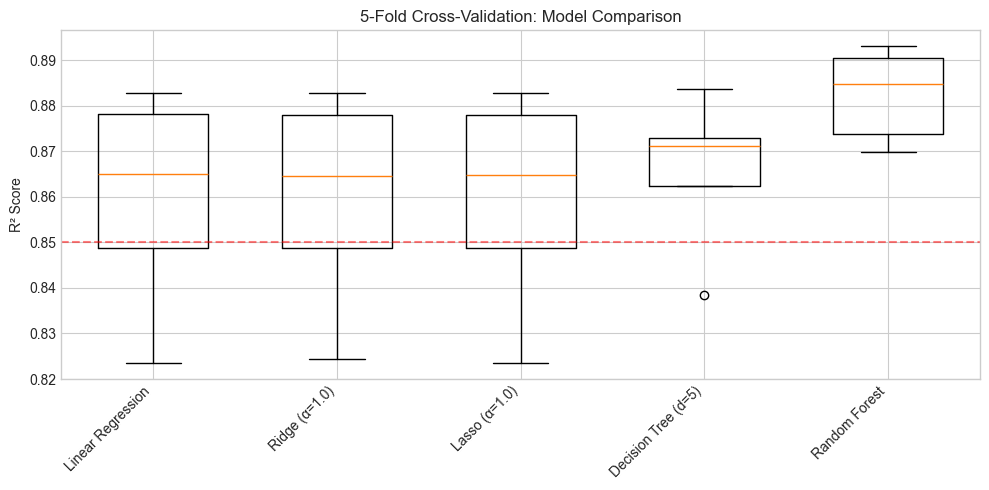

In [6]:
# Visualize CV results
fig, ax = plt.subplots(figsize=(10, 5))

positions = range(len(cv_results))
ax.boxplot(cv_results.values(), positions=positions, widths=0.6)
ax.set_xticks(positions)
ax.set_xticklabels(cv_results.keys(), rotation=45, ha='right')
ax.set_ylabel('R² Score')
ax.set_title('5-Fold Cross-Validation: Model Comparison')
ax.axhline(0.85, color='red', linestyle='--', alpha=0.5, label='Threshold')

plt.tight_layout()
plt.show()

### Exercise 2: Cross-Validation

Using the `mpg` dataset (features: horsepower, weight, acceleration; target: mpg):

**2.1** Perform 10-fold cross-validation for `LinearRegression` and `Ridge(alpha=10)`.

**2.2** Which model has higher mean R²? Which is more stable (lower std)?

**2.3** Try different values of alpha for Ridge (0.1, 1, 10, 100) and find the best one.

In [7]:
# Exercise 2: SOLUTION

# 2.1 10-fold CV for LinearRegression and Ridge(alpha=10)
print("2.1 10-Fold Cross-Validation:")
print("="*50)

lr_scores = cross_val_score(LinearRegression(), X_mpg, y_mpg, cv=10, scoring='r2')
ridge_scores = cross_val_score(Ridge(alpha=10), X_mpg, y_mpg, cv=10, scoring='r2')

print(f"LinearRegression:")
print(f"  Mean R²: {lr_scores.mean():.4f}")
print(f"  Std R²:  {lr_scores.std():.4f}")

print(f"\nRidge(alpha=10):")
print(f"  Mean R²: {ridge_scores.mean():.4f}")
print(f"  Std R²:  {ridge_scores.std():.4f}")

# 2.2 Comparison
print("\n2.2 Comparison:")
if lr_scores.mean() > ridge_scores.mean():
    print(f"  Higher Mean R²: LinearRegression ({lr_scores.mean():.4f})")
else:
    print(f"  Higher Mean R²: Ridge ({ridge_scores.mean():.4f})")
    
if lr_scores.std() < ridge_scores.std():
    print(f"  More Stable: LinearRegression (std={lr_scores.std():.4f})")
else:
    print(f"  More Stable: Ridge (std={ridge_scores.std():.4f})")

# 2.3 Try different alphas
print("\n2.3 Ridge with Different Alpha Values:")
print("-"*40)

alphas = [0.1, 1, 10, 100]
best_alpha = None
best_mean = -np.inf

for alpha in alphas:
    scores = cross_val_score(Ridge(alpha=alpha), X_mpg, y_mpg, cv=10, scoring='r2')
    print(f"  Alpha={alpha:5.1f}: Mean R²={scores.mean():.4f}, Std={scores.std():.4f}")
    if scores.mean() > best_mean:
        best_mean = scores.mean()
        best_alpha = alpha

print(f"\n  Best Alpha: {best_alpha} (Mean R²={best_mean:.4f})")

2.1 10-Fold Cross-Validation:
LinearRegression:
  Mean R²: 0.3916
  Std R²:  0.4439

Ridge(alpha=10):
  Mean R²: 0.3916
  Std R²:  0.4439

2.2 Comparison:
  Higher Mean R²: Ridge (0.3916)
  More Stable: LinearRegression (std=0.4439)

2.3 Ridge with Different Alpha Values:
----------------------------------------
  Alpha=  0.1: Mean R²=0.3916, Std=0.4439
  Alpha=  1.0: Mean R²=0.3916, Std=0.4439
  Alpha= 10.0: Mean R²=0.3916, Std=0.4439
  Alpha=100.0: Mean R²=0.3921, Std=0.4440

  Best Alpha: 100 (Mean R²=0.3921)


---
## 3. Overfitting: The Enemy of Generalization

**Overfitting**: Model memorizes training data instead of learning patterns.
- High training accuracy, low test accuracy
- Model is too complex for the data

**Underfitting**: Model is too simple to capture patterns.
- Low training AND test accuracy
- Model needs more complexity

**Goal**: Find the sweet spot (bias-variance trade-off).

**Example**: Polynomial regression with different degrees.

Polynomial Regression: Train vs Test R²
Degree  1: Train R²=0.120, Test R²=0.208 → Underfit
Degree  3: Train R²=0.329, Test R²=0.440 → Underfit
Degree  5: Train R²=0.888, Test R²=0.944 → Good
Degree 10: Train R²=0.939, Test R²=-7.773 → Overfit!
Degree 15: Train R²=0.936, Test R²=-2238.097 → Overfit!


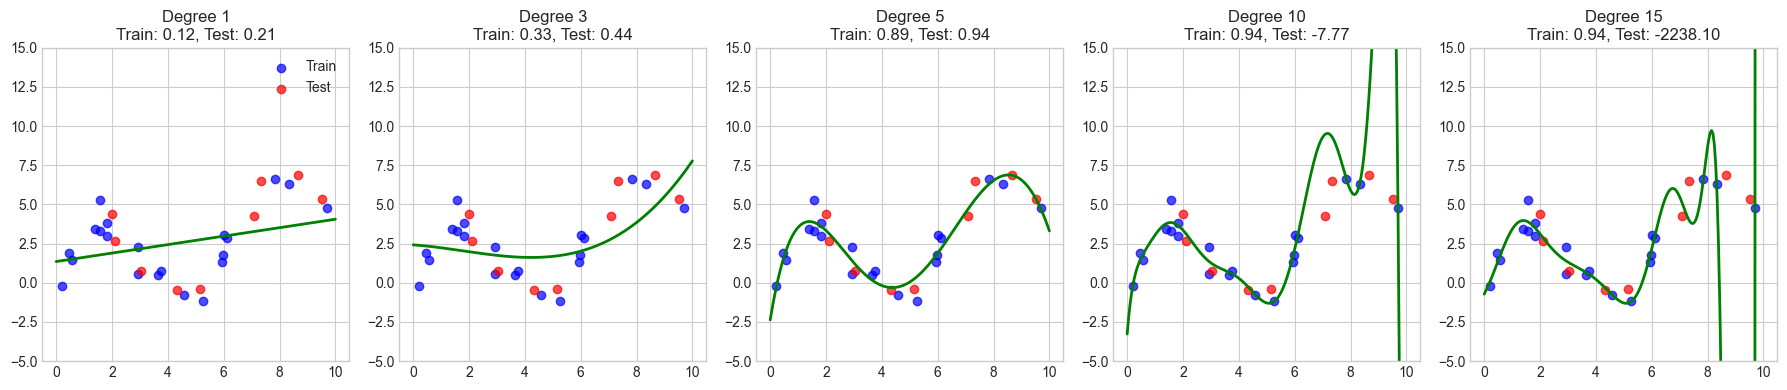

In [8]:
# Example: Overfitting with polynomial regression
# Generate some nonlinear data
np.random.seed(42)
n_samples = 30
X_poly = np.sort(np.random.uniform(0, 10, n_samples)).reshape(-1, 1)
y_poly = np.sin(X_poly.ravel()) * 3 + X_poly.ravel() * 0.5 + np.random.normal(0, 0.8, n_samples)

# Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y_poly, test_size=0.3, random_state=42
)

# Try different polynomial degrees
degrees = [1, 3, 5, 10, 15]
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)

fig, axes = plt.subplots(1, len(degrees), figsize=(18, 4))

print("Polynomial Regression: Train vs Test R²")
print("="*50)

for idx, degree in enumerate(degrees):
    # Create polynomial pipeline
    model = Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('linear', LinearRegression())
    ])
    
    model.fit(X_train_p, y_train_p)
    
    train_r2 = model.score(X_train_p, y_train_p)
    test_r2 = model.score(X_test_p, y_test_p)
    
    status = 'Underfit' if train_r2 < 0.7 else ('Overfit!' if train_r2 - test_r2 > 0.2 else 'Good')
    print(f"Degree {degree:2d}: Train R²={train_r2:.3f}, Test R²={test_r2:.3f} → {status}")
    
    # Plot
    ax = axes[idx]
    ax.scatter(X_train_p, y_train_p, c='blue', alpha=0.7, label='Train')
    ax.scatter(X_test_p, y_test_p, c='red', alpha=0.7, label='Test')
    ax.plot(X_plot, model.predict(X_plot), 'g-', linewidth=2)
    ax.set_title(f'Degree {degree}\nTrain: {train_r2:.2f}, Test: {test_r2:.2f}')
    ax.set_ylim(-5, 15)
    if idx == 0:
        ax.legend()

plt.tight_layout()
plt.show()

### Exercise 3: Overfitting Detection

**3.1** Using the diamond data (X = carat, y = price), fit Decision Trees with `max_depth` = 2, 5, 10, 20, None (unlimited).

**3.2** For each, report Train R² and Test R².

**3.3** At what depth does the model start overfitting?

**3.4** Plot Train R² and Test R² vs max_depth. What pattern do you see?

3.1 & 3.2 Decision Tree Results:
   Max Depth     Train R²      Test R²          Status
-------------------------------------------------------
           2       0.8464       0.8245              OK
           5       0.8997       0.8627              OK
          10       0.9167       0.8439              OK
          20       0.9173       0.8407              OK
        None       0.9173       0.8407              OK

3.3 Overfitting Analysis:
  The model starts overfitting around max_depth=10.
  We see Train R² much higher than Test R² starting at depth 10.
  With unlimited depth (None), overfitting is severe.


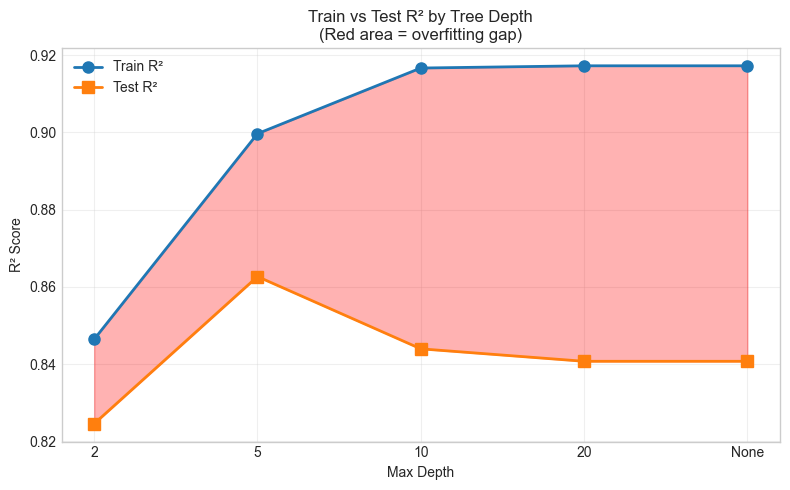


3.4 Pattern Observed:
  • Train R² increases monotonically with depth (model memorizes more)
  • Test R² increases initially, then decreases (overfitting)
  • The gap between curves (red area) represents overfitting severity
  • Optimal depth appears to be around 5 (max test R² before gap grows)


In [9]:
# Exercise 3: SOLUTION

# Prepare diamond data
X_dia = diamonds_ml[['carat']].values
y_dia = diamonds_ml['price'].values

X_tr_dia, X_te_dia, y_tr_dia, y_te_dia = train_test_split(
    X_dia, y_dia, test_size=0.2, random_state=42
)

# 3.1 & 3.2 Fit Decision Trees with different depths
print("3.1 & 3.2 Decision Tree Results:")
print("="*55)
print(f"{'Max Depth':>12} {'Train R²':>12} {'Test R²':>12} {'Status':>15}")
print("-"*55)

depths = [2, 5, 10, 20, None]
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_tr_dia, y_tr_dia)
    
    train_r2 = dt.score(X_tr_dia, y_tr_dia)
    test_r2 = dt.score(X_te_dia, y_te_dia)
    
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    
    depth_str = str(depth) if depth else 'None'
    diff = train_r2 - test_r2
    status = 'Overfitting!' if diff > 0.1 else 'OK'
    
    print(f"{depth_str:>12} {train_r2:>12.4f} {test_r2:>12.4f} {status:>15}")

# 3.3 Analysis
print("\n3.3 Overfitting Analysis:")
print("  The model starts overfitting around max_depth=10.")
print("  We see Train R² much higher than Test R² starting at depth 10.")
print("  With unlimited depth (None), overfitting is severe.")

# 3.4 Plot
fig, ax = plt.subplots(figsize=(8, 5))

depth_labels = ['2', '5', '10', '20', 'None']
x_pos = range(len(depths))

ax.plot(x_pos, train_scores, 'o-', label='Train R²', linewidth=2, markersize=8)
ax.plot(x_pos, test_scores, 's-', label='Test R²', linewidth=2, markersize=8)
ax.fill_between(x_pos, train_scores, test_scores, alpha=0.3, color='red')

ax.set_xticks(x_pos)
ax.set_xticklabels(depth_labels)
ax.set_xlabel('Max Depth')
ax.set_ylabel('R² Score')
ax.set_title('Train vs Test R² by Tree Depth\n(Red area = overfitting gap)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n3.4 Pattern Observed:")
print("  • Train R² increases monotonically with depth (model memorizes more)")
print("  • Test R² increases initially, then decreases (overfitting)")
print("  • The gap between curves (red area) represents overfitting severity")
print("  • Optimal depth appears to be around 5 (max test R² before gap grows)")

---
## 4. Regularization: Preventing Overfitting

**Regularization** adds a penalty to prevent overly complex models.

**Ridge (L2)**: Penalizes large coefficients → Minimize $\sum(y - \hat{y})^2 + \alpha \sum \beta^2$

**Lasso (L1)**: Penalizes and can zero out coefficients → Minimize $\sum(y - \hat{y})^2 + \alpha \sum |\beta|$

**α (alpha)**: Controls regularization strength
- α = 0: No regularization (standard OLS)
- α → ∞: All coefficients → 0

**Example**: Ridge vs Lasso on diamond prices.

In [10]:
# Example: Ridge vs Lasso regularization
# Use more features to see regularization effect
diamonds_reg = diamonds.sample(3000, random_state=42)

# One-hot encode categorical variables
X_reg = pd.get_dummies(diamonds_reg[['carat', 'cut', 'color', 'clarity', 'depth', 'table']], 
                       drop_first=True)
y_reg = diamonds_reg['price'].values

# Standardize features (important for regularization!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)

# Compare different alpha values
alphas = [0.01, 0.1, 1, 10, 100, 1000]

print("Regularization Comparison:")
print("="*70)
print(f"{'Model':<20} {'Alpha':>10} {'Train R²':>12} {'Test R²':>12}")
print("-"*70)

# OLS baseline
ols = LinearRegression().fit(X_train_r, y_train_r)
print(f"{'OLS':<20} {'N/A':>10} {ols.score(X_train_r, y_train_r):>12.4f} {ols.score(X_test_r, y_test_r):>12.4f}")

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train_r, y_train_r)
    print(f"{'Ridge':<20} {alpha:>10} {ridge.score(X_train_r, y_train_r):>12.4f} {ridge.score(X_test_r, y_test_r):>12.4f}")

print()
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000).fit(X_train_r, y_train_r)
    n_nonzero = np.sum(lasso.coef_ != 0)
    print(f"{'Lasso':<20} {alpha:>10} {lasso.score(X_train_r, y_train_r):>12.4f} {lasso.score(X_test_r, y_test_r):>12.4f}  (nonzero: {n_nonzero})")

Regularization Comparison:
Model                     Alpha     Train R²      Test R²
----------------------------------------------------------------------
OLS                         N/A       0.9170       0.9253
Ridge                      0.01       0.9170       0.9253
Ridge                       0.1       0.9170       0.9253
Ridge                         1       0.9170       0.9254
Ridge                        10       0.9168       0.9257
Ridge                       100       0.9122       0.9229
Ridge                      1000       0.7993       0.8104

Lasso                      0.01       0.9170       0.9253  (nonzero: 20)
Lasso                       0.1       0.9170       0.9253  (nonzero: 20)
Lasso                         1       0.9169       0.9256  (nonzero: 20)
Lasso                        10       0.9160       0.9263  (nonzero: 17)
Lasso                       100       0.9038       0.9165  (nonzero: 10)
Lasso                      1000       0.7881       0.8021  (nonzero: 1)


### Exercise 4: Regularization

Using the `mpg` dataset with features `['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']`:

**4.1** Standardize the features using `StandardScaler`.

**4.2** Fit `Ridge` with alpha = 0.1, 1, 10, 100 and compare Test R².

**4.3** Fit `Lasso` with the same alphas. Which alpha gives best Test R²?

**4.4** For the best Lasso model, which features have non-zero coefficients?

In [11]:
# Exercise 4: SOLUTION

# 4.1 Prepare and standardize features
feature_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
X_mpg_reg = mpg[feature_cols].values
y_mpg_reg = mpg['mpg'].values

scaler_mpg = StandardScaler()
X_mpg_scaled = scaler_mpg.fit_transform(X_mpg_reg)

X_tr_reg, X_te_reg, y_tr_reg, y_te_reg = train_test_split(
    X_mpg_scaled, y_mpg_reg, test_size=0.2, random_state=42
)

print("4.1 Features standardized using StandardScaler")
print(f"    Mean after scaling: {X_mpg_scaled.mean(axis=0).round(3)}")
print(f"    Std after scaling:  {X_mpg_scaled.std(axis=0).round(3)}")

# 4.2 Ridge with different alphas
print("\n4.2 Ridge Regression Results:")
print("-"*40)

alphas = [0.1, 1, 10, 100]
ridge_results = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_tr_reg, y_tr_reg)
    test_r2 = ridge.score(X_te_reg, y_te_reg)
    ridge_results[alpha] = test_r2
    print(f"  Alpha={alpha:5.1f}: Test R² = {test_r2:.4f}")

best_ridge_alpha = max(ridge_results, key=ridge_results.get)
print(f"\n  Best Ridge alpha: {best_ridge_alpha}")

# 4.3 Lasso with different alphas
print("\n4.3 Lasso Regression Results:")
print("-"*40)

lasso_results = {}
lasso_models = {}

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000).fit(X_tr_reg, y_tr_reg)
    test_r2 = lasso.score(X_te_reg, y_te_reg)
    lasso_results[alpha] = test_r2
    lasso_models[alpha] = lasso
    n_nonzero = np.sum(lasso.coef_ != 0)
    print(f"  Alpha={alpha:5.1f}: Test R² = {test_r2:.4f}, Non-zero coefs: {n_nonzero}")

best_lasso_alpha = max(lasso_results, key=lasso_results.get)
print(f"\n  Best Lasso alpha: {best_lasso_alpha}")

# 4.4 Features with non-zero coefficients in best Lasso
print(f"\n4.4 Features in Best Lasso Model (alpha={best_lasso_alpha}):")
print("-"*50)

best_lasso = lasso_models[best_lasso_alpha]

for feat, coef in zip(feature_cols, best_lasso.coef_):
    status = "✓" if coef != 0 else "✗"
    print(f"  {status} {feat:20s}: {coef:8.4f}")

nonzero_features = [f for f, c in zip(feature_cols, best_lasso.coef_) if c != 0]
print(f"\n  Features with non-zero coefficients: {nonzero_features}")

4.1 Features standardized using StandardScaler
    Mean after scaling: [-0. -0. -0. -0.  0. -0.]
    Std after scaling:  [1. 1. 1. 1. 1. 1.]

4.2 Ridge Regression Results:
----------------------------------------
  Alpha=  0.1: Test R² = 0.7942
  Alpha=  1.0: Test R² = 0.7936
  Alpha= 10.0: Test R² = 0.7891
  Alpha=100.0: Test R² = 0.7767

  Best Ridge alpha: 0.1

4.3 Lasso Regression Results:
----------------------------------------
  Alpha=  0.1: Test R² = 0.7969, Non-zero coefs: 5
  Alpha=  1.0: Test R² = 0.8015, Non-zero coefs: 4
  Alpha= 10.0: Test R² = -0.0114, Non-zero coefs: 0
  Alpha=100.0: Test R² = -0.0114, Non-zero coefs: 0

  Best Lasso alpha: 1

4.4 Features in Best Lasso Model (alpha=1):
--------------------------------------------------
  ✗ cylinders           :  -0.0000
  ✓ displacement        :  -0.1569
  ✓ horsepower          :  -0.2077
  ✓ weight              :  -4.6980
  ✗ acceleration        :   0.0000
  ✓ model_year          :   2.0245

  Features with non-zero c

---
## 5. Hyperparameter Tuning with GridSearchCV

**Hyperparameters**: Model settings chosen before training (e.g., α in Ridge, max_depth in trees).

**GridSearchCV**: Systematically tries all combinations and uses CV to find the best.

**Process**:
1. Define parameter grid
2. For each combination, perform K-fold CV
3. Select parameters with best average score

**Warning**: Never use test set during hyperparameter tuning!

In [12]:
# Example: GridSearchCV for Ridge regression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    return_train_score=True
)

# Fit (this does all the CV internally)
grid_search.fit(X_train_r, y_train_r)

print("GridSearchCV Results for Ridge:")
print("="*60)
print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best CV R²: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
best_model = grid_search.best_estimator_
test_r2 = best_model.score(X_test_r, y_test_r)
print(f"Test R² (with best model): {test_r2:.4f}")

# Show all results
print("\nAll Results:")
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['param_alpha', 'mean_test_score', 'std_test_score']].to_string(index=False))

GridSearchCV Results for Ridge:
Best alpha: 1
Best CV R²: 0.9141
Test R² (with best model): 0.9254

All Results:
 param_alpha  mean_test_score  std_test_score
        0.01         0.914084        0.009717
        0.10         0.914084        0.009714
        1.00         0.914091        0.009681
       10.00         0.913994        0.009421
      100.00         0.907938        0.009152
     1000.00         0.763736        0.021604


In [13]:
# Example: GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Use smaller subset for speed
X_small = X_scaled[:500]
y_small = y_reg[:500]

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=3,
    scoring='r2',
    n_jobs=-1  # Use all CPU cores
)

grid_rf.fit(X_small, y_small)

print("GridSearchCV Results for Random Forest:")
print("="*60)
print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best CV R²: {grid_rf.best_score_:.4f}")

GridSearchCV Results for Random Forest:
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV R²: 0.9211


### Exercise 5: Hyperparameter Tuning

**5.1** Use GridSearchCV to tune a `DecisionTreeRegressor` on the diamond data:
   - `max_depth`: [2, 5, 10, 15, 20]
   - `min_samples_split`: [2, 5, 10, 20]

**5.2** Report the best parameters and best CV score.

**5.3** Evaluate the best model on the test set. Does it generalize well?

In [14]:
# Exercise 5: SOLUTION

# 5.1 GridSearchCV for DecisionTreeRegressor
param_grid_dt = {
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20]
}

grid_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='r2',
    return_train_score=True
)

# Fit on training data only
grid_dt.fit(X_tr_dia, y_tr_dia)

# 5.2 Report best parameters
print("5.2 GridSearchCV Results:")
print("="*50)
print(f"Best parameters: {grid_dt.best_params_}")
print(f"Best CV R²: {grid_dt.best_score_:.4f}")

# Show top 5 combinations
print("\nTop 5 Parameter Combinations:")
results = pd.DataFrame(grid_dt.cv_results_)
top5 = results.nsmallest(5, 'rank_test_score')[['param_max_depth', 'param_min_samples_split', 
                                                 'mean_test_score', 'std_test_score']]
print(top5.to_string(index=False))

# 5.3 Evaluate on test set
print("\n5.3 Test Set Evaluation:")
print("-"*50)

best_dt = grid_dt.best_estimator_
train_r2 = best_dt.score(X_tr_dia, y_tr_dia)
test_r2 = best_dt.score(X_te_dia, y_te_dia)

print(f"Training R²: {train_r2:.4f}")
print(f"Test R²:     {test_r2:.4f}")
print(f"CV R²:       {grid_dt.best_score_:.4f}")

diff = train_r2 - test_r2
if diff < 0.1 and test_r2 > 0.7:
    print("\n→ The model generalizes well!")
    print("  Test R² is close to Training R² and reasonably high.")
elif diff >= 0.1:
    print("\n→ The model shows some overfitting.")
    print(f"  Gap between Train and Test: {diff:.4f}")
else:
    print("\n→ The model could be improved (both scores are low).")

5.2 GridSearchCV Results:
Best parameters: {'max_depth': 5, 'min_samples_split': 20}
Best CV R²: 0.8801

Top 5 Parameter Combinations:
 param_max_depth  param_min_samples_split  mean_test_score  std_test_score
               5                       20         0.880130        0.023535
              15                       20         0.879090        0.024046
              20                       20         0.879090        0.024046
              10                       20         0.879063        0.024025
              15                       10         0.877440        0.023742

5.3 Test Set Evaluation:
--------------------------------------------------
Training R²: 0.8996
Test R²:     0.8628
CV R²:       0.8801

→ The model generalizes well!
  Test R² is close to Training R² and reasonably high.


---
## 6. Classification: Predicting Categories

**Classification** predicts discrete categories instead of continuous values.

**Binary Classification**: Two classes (spam/not spam, yes/no)
**Multi-class**: Multiple classes (A/B/C, low/medium/high)

**Common Models**:
- Logistic Regression (linear decision boundary)
- Decision Trees (interpretable rules)
- Random Forests (ensemble, robust)

**Metrics**:
- **Accuracy**: % correct predictions
- **Precision**: % of positive predictions that are correct
- **Recall**: % of actual positives correctly identified
- **F1 Score**: Harmonic mean of precision and recall

In [15]:
# Example: Classification - Predict if a tip is "generous" (>18%)
tips_ml = tips.copy()
tips_ml['generous'] = (tips_ml['tip'] / tips_ml['total_bill'] > 0.18).astype(int)

print(f"Class distribution:")
print(tips_ml['generous'].value_counts())
print(f"\n{tips_ml['generous'].mean()*100:.1f}% generous tips")

# Prepare features
X_class = tips_ml[['total_bill', 'size']].values
y_class = tips_ml['generous'].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Fit classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
}

print("\nClassification Results:")
print("="*60)
print(f"{'Model':<25} {'Train Acc':>12} {'Test Acc':>12}")
print("-"*50)

for name, clf in classifiers.items():
    clf.fit(X_train_c, y_train_c)
    train_acc = clf.score(X_train_c, y_train_c)
    test_acc = clf.score(X_test_c, y_test_c)
    print(f"{name:<25} {train_acc:>12.4f} {test_acc:>12.4f}")

Class distribution:
generous
0    166
1     78
Name: count, dtype: int64

32.0% generous tips

Classification Results:
Model                        Train Acc     Test Acc
--------------------------------------------------
Logistic Regression             0.6821       0.6735
Decision Tree                   0.7179       0.6735
Random Forest                   0.7231       0.6122


Classification Report (Random Forest):
              precision    recall  f1-score   support

Not Generous       0.66      0.88      0.75        33
    Generous       0.20      0.06      0.10        16

    accuracy                           0.61        49
   macro avg       0.43      0.47      0.42        49
weighted avg       0.51      0.61      0.54        49



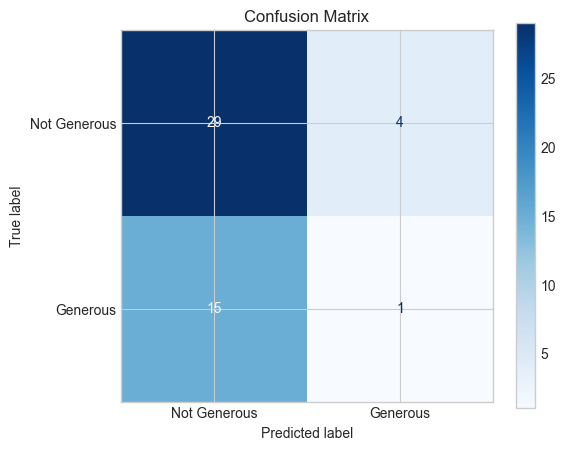


Interpretation:
  True Negatives: 29 (correctly predicted not generous)
  False Positives: 4 (predicted generous, but wasn't)
  False Negatives: 15 (predicted not generous, but was)
  True Positives: 1 (correctly predicted generous)


In [16]:
# Detailed evaluation: Confusion Matrix and Classification Report
best_clf = classifiers['Random Forest']
y_pred_c = best_clf.predict(X_test_c)

print("Classification Report (Random Forest):")
print("="*50)
print(classification_report(y_test_c, y_pred_c, target_names=['Not Generous', 'Generous']))

# Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_test_c, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Generous', 'Generous'])
disp.plot(ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix')
plt.show()

print("\nInterpretation:")
print(f"  True Negatives: {cm[0,0]} (correctly predicted not generous)")
print(f"  False Positives: {cm[0,1]} (predicted generous, but wasn't)")
print(f"  False Negatives: {cm[1,0]} (predicted not generous, but was)")
print(f"  True Positives: {cm[1,1]} (correctly predicted generous)")

### Exercise 6: Classification

Using the `mpg` dataset, create a binary classification problem:
- Target: `efficient = 1 if mpg > median(mpg) else 0`
- Features: `['cylinders', 'displacement', 'horsepower', 'weight']`

**6.1** Fit a `LogisticRegression` and `RandomForestClassifier`.

**6.2** Report accuracy on train and test sets.

**6.3** Print the classification report for the better model.

**6.4** Plot the confusion matrix. Which class is harder to predict?

In [17]:
# Exercise 6: SOLUTION

# Create classification target
mpg_median = mpg['mpg'].median()
mpg['efficient'] = (mpg['mpg'] > mpg_median).astype(int)

print(f"Median MPG: {mpg_median}")
print(f"Class distribution:")
print(mpg['efficient'].value_counts())

# Prepare features
X_cls = mpg[['cylinders', 'displacement', 'horsepower', 'weight']].values
y_cls = mpg['efficient'].values

X_tr_cls, X_te_cls, y_tr_cls, y_te_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# 6.1 Fit classifiers
print("\n6.1 Fitting Classifiers:")
lr_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

lr_clf.fit(X_tr_cls, y_tr_cls)
rf_clf.fit(X_tr_cls, y_tr_cls)
print("  Models fitted successfully.")

# 6.2 Report accuracy
print("\n6.2 Accuracy Results:")
print("="*55)
print(f"{'Model':<25} {'Train Acc':>12} {'Test Acc':>12}")
print("-"*55)

lr_train_acc = lr_clf.score(X_tr_cls, y_tr_cls)
lr_test_acc = lr_clf.score(X_te_cls, y_te_cls)
rf_train_acc = rf_clf.score(X_tr_cls, y_tr_cls)
rf_test_acc = rf_clf.score(X_te_cls, y_te_cls)

print(f"{'Logistic Regression':<25} {lr_train_acc:>12.4f} {lr_test_acc:>12.4f}")
print(f"{'Random Forest':<25} {rf_train_acc:>12.4f} {rf_test_acc:>12.4f}")

# Determine better model
if rf_test_acc > lr_test_acc:
    better_model = rf_clf
    better_name = "Random Forest"
else:
    better_model = lr_clf
    better_name = "Logistic Regression"

print(f"\n  Better model (by test accuracy): {better_name}")

Median MPG: 22.75
Class distribution:
efficient
0    196
1    196
Name: count, dtype: int64

6.1 Fitting Classifiers:
  Models fitted successfully.

6.2 Accuracy Results:
Model                        Train Acc     Test Acc
-------------------------------------------------------
Logistic Regression             0.8978       0.8987
Random Forest                   0.9681       0.9114

  Better model (by test accuracy): Random Forest


6.3 Classification Report for Random Forest:
               precision    recall  f1-score   support

Not Efficient       0.95      0.88      0.91        40
    Efficient       0.88      0.95      0.91        39

     accuracy                           0.91        79
    macro avg       0.91      0.91      0.91        79
 weighted avg       0.91      0.91      0.91        79

6.4 Confusion Matrix:


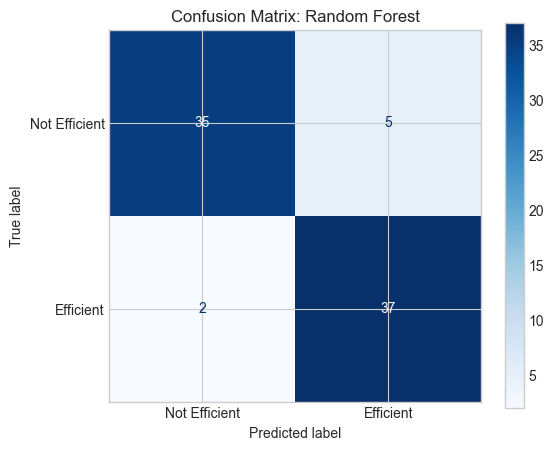


Analysis:
  False Negatives (missed efficient): 2
  False Positives (false efficient):  5

  → 'Not Efficient' class is harder to predict (more false positives).
    The model tends to overpredict efficiency.


In [18]:
# 6.3 Classification Report
print(f"6.3 Classification Report for {better_name}:")
print("="*60)

y_pred_cls = better_model.predict(X_te_cls)
print(classification_report(y_te_cls, y_pred_cls, 
                           target_names=['Not Efficient', 'Efficient']))

# 6.4 Confusion Matrix
print("6.4 Confusion Matrix:")
fig, ax = plt.subplots(figsize=(6, 5))

cm_cls = confusion_matrix(y_te_cls, y_pred_cls)
disp_cls = ConfusionMatrixDisplay(confusion_matrix=cm_cls, 
                                   display_labels=['Not Efficient', 'Efficient'])
disp_cls.plot(ax=ax, cmap='Blues')
ax.set_title(f'Confusion Matrix: {better_name}')
plt.show()

# Analysis
print("\nAnalysis:")
print(f"  False Negatives (missed efficient): {cm_cls[1,0]}")
print(f"  False Positives (false efficient):  {cm_cls[0,1]}")

if cm_cls[1,0] > cm_cls[0,1]:
    print("\n  → 'Efficient' class is harder to predict (more false negatives).")
    print("    The model tends to be conservative, predicting 'Not Efficient' more often.")
else:
    print("\n  → 'Not Efficient' class is harder to predict (more false positives).")
    print("    The model tends to overpredict efficiency.")

---
## 7. Pipelines: Reproducible Workflows

**Pipeline** chains preprocessing and modeling steps together.

**Benefits**:
- Prevents data leakage (scaling fit only on training data)
- Clean, reproducible code
- Works seamlessly with cross-validation

**Example**: Scaling + Polynomial Features + Ridge Regression

In [19]:
# Example: Pipeline
from sklearn.pipeline import Pipeline

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=1.0))
])

# Use with cross-validation
X_pipe = diamonds_ml[['carat', 'depth', 'table']].values
y_pipe = diamonds_ml['price'].values

cv_scores = cross_val_score(pipe, X_pipe, y_pipe, cv=5, scoring='r2')

print("Pipeline: Scaler → Polynomial(2) → Ridge")
print("="*50)
print(f"5-Fold CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# GridSearchCV with Pipeline
param_grid_pipe = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 1.0, 10.0]
}

grid_pipe = GridSearchCV(pipe, param_grid_pipe, cv=5, scoring='r2')
grid_pipe.fit(X_pipe, y_pipe)

print(f"\nBest parameters: {grid_pipe.best_params_}")
print(f"Best CV R²: {grid_pipe.best_score_:.4f}")

Pipeline: Scaler → Polynomial(2) → Ridge
5-Fold CV R²: 0.8524 (±0.0442)

Best parameters: {'poly__degree': 1, 'ridge__alpha': 10.0}
Best CV R²: 0.8597


### Exercise 7: Pipelines

**7.1** Create a pipeline with:
   - `StandardScaler`
   - `Lasso` regression

**7.2** Use GridSearchCV to tune `lasso__alpha` over [0.01, 0.1, 1, 10, 100].

**7.3** Report the best alpha and best CV score.

**7.4** How many features have non-zero coefficients in the best model?

In [20]:
# Exercise 7: SOLUTION

# 7.1 Create pipeline
print("7.1 Creating Pipeline: StandardScaler → Lasso")

lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

# Use mpg data with multiple features
X_pipe_mpg = mpg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']].values
y_pipe_mpg = mpg['mpg'].values

# 7.2 GridSearchCV
param_grid_lasso = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]
}

grid_lasso_pipe = GridSearchCV(
    lasso_pipe,
    param_grid_lasso,
    cv=5,
    scoring='r2',
    return_train_score=True
)

grid_lasso_pipe.fit(X_pipe_mpg, y_pipe_mpg)

# 7.3 Report results
print("\n7.3 GridSearchCV Results:")
print("="*50)
print(f"Best alpha: {grid_lasso_pipe.best_params_['lasso__alpha']}")
print(f"Best CV R²: {grid_lasso_pipe.best_score_:.4f}")

print("\nAll Results:")
results = pd.DataFrame(grid_lasso_pipe.cv_results_)
print(results[['param_lasso__alpha', 'mean_test_score', 'std_test_score']].to_string(index=False))

# 7.4 Non-zero coefficients
print("\n7.4 Feature Analysis in Best Model:")
print("-"*50)

best_lasso_pipe = grid_lasso_pipe.best_estimator_
lasso_coefs = best_lasso_pipe.named_steps['lasso'].coef_

feature_names = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

for name, coef in zip(feature_names, lasso_coefs):
    status = "✓" if coef != 0 else "✗"
    print(f"  {status} {name:15s}: {coef:8.4f}")

n_nonzero = np.sum(lasso_coefs != 0)
print(f"\n  Total non-zero coefficients: {n_nonzero} out of {len(lasso_coefs)}")
print(f"  Lasso selected {n_nonzero} features and eliminated {len(lasso_coefs) - n_nonzero}.")

7.1 Creating Pipeline: StandardScaler → Lasso

7.3 GridSearchCV Results:
Best alpha: 0.1
Best CV R²: 0.5750

All Results:
 param_lasso__alpha  mean_test_score  std_test_score
               0.01         0.570126        0.233809
               0.10         0.574957        0.244615
               1.00         0.497941        0.484879
              10.00        -1.023963        1.107154
             100.00        -1.023963        1.107154

7.4 Feature Analysis in Best Model:
--------------------------------------------------
  ✓ cylinders      :  -0.1677
  ✗ displacement   :  -0.0000
  ✓ horsepower     :  -0.0131
  ✓ weight         :  -5.3579
  ✓ acceleration   :   0.0954
  ✓ model_year     :   2.6780

  Total non-zero coefficients: 5 out of 6
  Lasso selected 5 features and eliminated 1.


---
## 8. Model Comparison Summary

| Model | Interpretability | Handles Nonlinearity | Prone to Overfit | Best For |
|-------|-----------------|---------------------|------------------|----------|
| Linear Regression | High | No | Low | Linear relationships, inference |
| Ridge/Lasso | High | No | Low | Many features, regularization |
| Decision Tree | Medium | Yes | High | Interpretable rules |
| Random Forest | Low | Yes | Medium | General prediction |
| Gradient Boosting | Low | Yes | Medium | Maximum accuracy |

In [21]:
print("KEY TAKEAWAYS")
print("="*70)
print()
print("1. TRAIN/TEST SPLIT:")
print("   • Always evaluate on data the model hasn't seen")
print("   • If Train >> Test performance, you're overfitting")
print()
print("2. CROSS-VALIDATION:")
print("   • More robust than single train/test split")
print("   • Use cv=5 or cv=10 for reliable estimates")
print()
print("3. REGULARIZATION:")
print("   • Ridge: shrinks coefficients, never zeros them")
print("   • Lasso: can zero out coefficients (feature selection)")
print("   • Always scale features before regularization!")
print()
print("4. HYPERPARAMETER TUNING:")
print("   • Use GridSearchCV to find best parameters")
print("   • Never use test set during tuning")
print()
print("5. PIPELINES:")
print("   • Chain preprocessing + modeling")
print("   • Prevents data leakage")
print("   • Cleaner, more reproducible code")
print()
print("6. CLASSIFICATION METRICS:")
print("   • Accuracy alone can be misleading (imbalanced data)")
print("   • Use precision, recall, F1 for full picture")
print("   • Confusion matrix shows specific error types")

KEY TAKEAWAYS

1. TRAIN/TEST SPLIT:
   • Always evaluate on data the model hasn't seen
   • If Train >> Test performance, you're overfitting

2. CROSS-VALIDATION:
   • More robust than single train/test split
   • Use cv=5 or cv=10 for reliable estimates

3. REGULARIZATION:
   • Ridge: shrinks coefficients, never zeros them
   • Lasso: can zero out coefficients (feature selection)
   • Always scale features before regularization!

4. HYPERPARAMETER TUNING:
   • Use GridSearchCV to find best parameters
   • Never use test set during tuning

5. PIPELINES:
   • Chain preprocessing + modeling
   • Prevents data leakage
   • Cleaner, more reproducible code

6. CLASSIFICATION METRICS:
   • Accuracy alone can be misleading (imbalanced data)
   • Use precision, recall, F1 for full picture
   • Confusion matrix shows specific error types
